<a href="https://colab.research.google.com/github/cvillegas188/LaSalleCarlosV/blob/main/TRANSFERENCIADEAPRENDIZAJE/TransferenciaDeAprendizaje_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar el modelo de interes
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#MobileNet
from tensorflow.keras.applications.mobilenet import MobileNet
IMAGE_SIZE = (224, 224) #Defines el tamaño


In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator #libreria
BATCH_SIZE = 32 #Cuantas imagenes en paralelo vas a meter

train_dir = "/content/drive/MyDrive/Inteligencia-Computacional/fotos/train"
test_dir = "/content/drive/MyDrive/Inteligencia-Computacional/fotos/test"

train_datagen = ImageDataGenerator(rescale=1/255.) #Normalización de los datos
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Train images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data=test_datagen.flow_from_directory(test_dir,
                                            target_size=IMAGE_SIZE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="categorical")

In [ ]:
imgs, labels = next(train_data)

In [ ]:
labels.shape

(32, 5)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout
  plt.show()

In [ ]:
plotImages(imgs)
print(labels)
# Etiquetas
# 1. ajolotes 2. ardillas 3. cubrebocas 4. orugas 5. tacos

In [ ]:
#MobileNet

pre_trained_model = MobileNet(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)

In [ ]:
pre_trained_model.trainable = False

In [ ]:
pre_trained_model.output

<KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>

In [ ]:
pre_trained_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
pre_trained_model.summary()

In [ ]:
x = Flatten()(pre_trained_model.output)
x = Dense(2048, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(16, activation='sigmoid')(x)
predicciones= Dense(5, activation='softmax')(x)

In [ ]:
modelo = Model(inputs=pre_trained_model.input, outputs=predicciones)
modelo.summary()

In [ ]:
modelo.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = modelo.fit(train_data, validation_data=test_data, epochs=10, batch_size=100)

Epoch 1/10
8/8 [==============================] - 66s 8s/step - loss: 1.0877 - accuracy: 0.7080 - val_loss: 0.7297 - val_accuracy: 0.9680
Epoch 2/10
8/8 [==============================] - 5s 714ms/step - loss: 0.5970 - accuracy: 1.0000 - val_loss: 0.6458 - val_accuracy: 0.9880
Epoch 3/10
8/8 [==============================] - 6s 796ms/step - loss: 0.5312 - accuracy: 1.0000 - val_loss: 0.6060 - val_accuracy: 0.9880
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.4989 - accuracy: 1.0000 - val_loss: 0.5776 - val_accuracy: 0.9880
Epoch 5/10
8/8 [==============================] - 6s 743ms/step - loss: 0.4759 - accuracy: 1.0000 - val_loss: 0.5549 - val_accuracy: 0.9920
Epoch 6/10
8/8 [==============================] - 6s 792ms/step - loss: 0.4557 - accuracy: 1.0000 - val_loss: 0.5333 - val_accuracy: 0.9960
Epoch 7/10
8/8 [==============================] - 5s 681ms/step - loss: 0.4381 - accuracy: 1.0000 - val_loss: 0.5142 - val_accuracy: 0.9960
Epoch 8/10
8/8 [=========

In [ ]:
# Guardar el modelo en formato HDF5
modelo.save('/content/drive/MyDrive/DATASET 2024/model_mobilenet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/Inteligencia-Computacional/fotos/test/Tacos/001 (101).jpg'

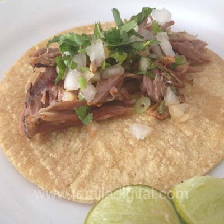

In [ ]:
img = image.load_img(img_path, target_size=(224,224))
img

In [ ]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input
X = preprocess_input(X)
preds = modelo.predict(X)

1/1 [==============================] - 0s 29ms/step


In [ ]:
preds.shape

(1, 5)

In [ ]:
preds

array([[0.122744  , 0.06933681, 0.08864664, 0.13130078, 0.58797175]],
      dtype=float32)

In [ ]:
np.argmax(preds, axis=1)

array([4])

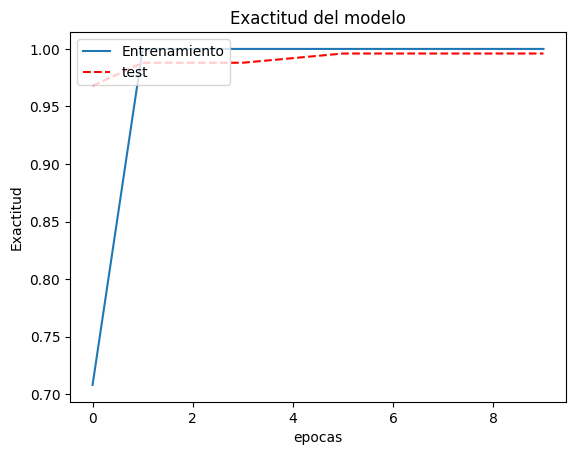

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()